In [15]:
import pandas as pd
data = pd.read_csv("/content/DELL.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,21.777945,22.993132,21.693752,22.440264,21.538488,13801490
1,2017-12-04,22.504812,22.521650,20.952852,21.017401,20.172800,8513645
2,2017-12-05,20.927595,21.278399,20.644144,20.899530,20.059671,6129126
3,2017-12-06,20.767628,21.182980,20.697468,21.065109,20.218594,7828790
4,2017-12-07,21.278399,21.601139,21.205433,21.298044,20.442167,7163534


In [16]:
data['Date'] =pd.to_datetime(data['Date'])
data.index= data['Date']

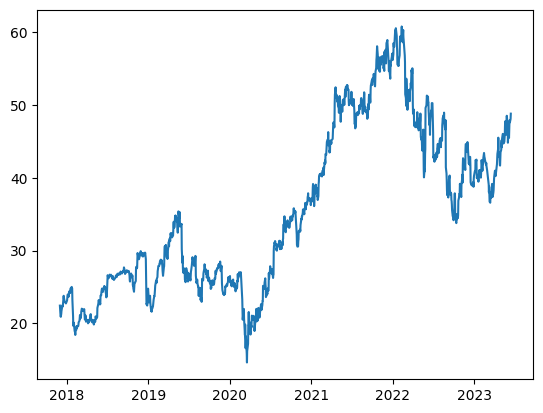

In [17]:
import matplotlib.pyplot as plt
plt.plot(data.index,data['Close'])

In [18]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [19]:
# 2. Đọc file dữ liệu chứng khoán DELL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/DELL.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index



# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [20]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
fit = model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1974.368, Time=3.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1979.737, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1981.676, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1981.684, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1979.821, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1979.130, Time=1.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1979.999, Time=1.49 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1975.878, Time=8.64 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1975.921, Time=5.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1983.305, Time=1.64 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1979.694, Time=4.65 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1980.496, Time=1.84 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1977.340, Time=5.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1974.293, Time=0.99 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [22]:
train_data.index

RangeIndex(start=0, stop=973, step=1)

In [23]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [24]:

from datetime import timedelta

In [25]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
#last_index =  df.index[-1]
last_index=len(df)
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[52.56464031 52.63165715 52.64150635 52.58695254 52.55970671 52.59751312
 52.63404792 52.61390892 52.57541005 52.57960132 52.61432241 52.62262071
 52.59545383 52.57895216 52.59677181 52.61715584 52.60874981 52.58824173
 52.58846714 52.60627363 52.61219269 52.59883144 52.58912682 52.5973454
 52.60855686 52.60530146 52.59449148 52.5935941  52.60263113 52.60650981]


In [26]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 10.814993975423645
Testing RMSE: 8.566357459500788


RMSE thường được sử dụng để đánh giá độ chính xác của mô hình dự đoán với các giá trị liên tục, như giá cổ phiếu, điểm số, nhiệt độ, v.v. Giá trị RMSE càng nhỏ, mô hình dự đoán càng chính xác. Vậy với dữ liệu này mô hình Arima chính xác hơn

Validation RMSE: 10.814993975423645
Testing RMSE: 8.566357459500788
Validation MAE: 10.423155842734886
Testing MAE: 7.055398241093855
Validation MAPE: 0.2528951043390106
Testing MAPE: 0.16418841467069997


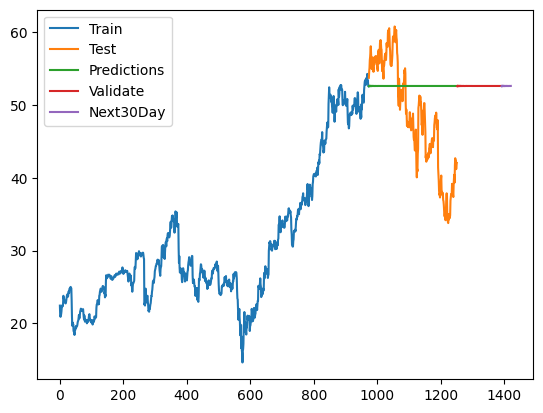

In [27]:


# 8. Tính RMSE, MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mae= np.mean(np.abs(y_pred_val - y_val))
test_mae= np.mean(np.abs(y_pred - y_test))
valid_mape= np.mean(np.abs((y_pred_val - y_val) / y_val))
test_mape= np.mean(np.abs((y_pred - y_test) /y_test))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [28]:
test_data.index

RangeIndex(start=973, stop=1251, step=1)